##  Введение

В этом задании вам предстоит научиться работать с географическими данными. В Питоне есть огромное количество библиотек, позволяющих эти данные обрабатывать и визуализировать; выберите ту, которая вам больше понравится. Вам может помочь руководство kaggle по работе с картами: ["Семнадцать способов рисовать данные на картах"](http://blog.kaggle.com/2016/11/30/seventeen-ways-to-map-data-in-kaggle-kernels/). 
Смотрите также:
- модуль [basemap](http://matplotlib.org/basemap/) ([пример](https://www.machinalis.com/blog/embedding-interactive-maps-into-an-ipython-nb/), [ещё пример](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb))
- плагин [gmaps](https://github.com/pbugnion/gmaps)
- виджет [ipyleaflet](https://github.com/ellisonbg/ipyleaflet) (крайне минималистичный [пример](https://github.com/ellisonbg/ipyleaflet/blob/master/examples/MapContainer.ipynb))
- модуль [folium](https://github.com/python-visualization/folium)

Поскольку мы агрегировали данные по равномерной сетке, можно ожидать, что существенное количество ячеек окажется в районах города, где вызов такси невозможен (реки, заливы, острова, парки). Теоретически ряды, соответствующие таким ячейка, должны состоять из одних нулей, но на практике это может быть не так: устройства, определяющие координаты автомобилей в момент начала поездки, несовершенны и могут ошибаться, показывая, например, что такси находится в середине реки. Чтобы правильно отобрать ячейки, вам понадобится визуализировать их границы на карте и отфильтровать те, из которых поездки на такси невозможны.

## Задачи

Чтобы сдать задание, выполните следующую последовательность действий.

1\. Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("complete_data/1. First_data.csv", sep=",")
data.head(5)

,Trend,cos_week_1,cos_week_2,cos_week_3,cos_week_4,cos_week_5,cos_week_6,cos_year_1,cos_year_10,cos_year_11,...,UNK_payment_type,N_store_and_fwd_flag,UN_store_and_fwd_flag,Y_store_and_fwd_flag,visibility,temp,dew_point_temp,relative_humidity,wind_speed,holiday
0,1417,-0.916562,0.680173,-0.330279,-0.07473,0.467269,-0.781831,0.527059,0.0,0.0,...,0.0,0.625000,0.437500,0.0,10.0,1.4,-1.7,70.0,7.0,False
1,1417,-0.916562,0.680173,-0.330279,-0.07473,0.000000,0.000000,0.527059,0.0,0.0,...,0.0,0.562500,0.250000,0.0,10.0,1.4,-1.7,70.0,7.0,False
2,1417,-0.916562,0.680173,-0.330279,-0.07473,0.000000,0.000000,0.527059,0.0,0.0,...,0.0,0.692308,0.384615,0.0,10.0,1.4,-1.7,70.0,7.0,False
3,1417,-0.916562,0.680173,-0.330279,0.00000,0.000000,0.000000,0.527059,0.0,0.0,...,0.0,0.375000,0.437500,0.0,10.0,1.4,-1.7,70.0,7.0,False
4,1417,-0.916562,0.680173,-0.330279,0.00000,0.000000,0.000000,0.527059,0.0,0.0,...,0.0,0.382353,0.764706,0.0,10.0,1.4,-1.7,70.0,7.0,False


In [10]:
from datetime import datetime

data["time"] = list(map(lambda x: datetime(x[0], int(x[1]), x[2], int(x[3])), data[["year", "month", "day", "hour"]].get_values()))

In [11]:
# Рассчитать сумму поездкок за весь месяц у каждого региона
region_trips_data = data.groupby(["region"]).trips.sum()

In [12]:
zero_trip_reg_count = region_trips_data[region_trips_data == 0].shape[0]
print("Regions without trips count is %d" % zero_trip_reg_count)

Regions without trips count is 0


2\. Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

In [14]:
import matplotlib.pyplot as plt
import shapefile
import os
from mpl_toolkits.basemap import Basemap


title = 'New York'
descripton = 'Empire State Building in the map of the New York \nData: OpenStreetMap - openstreetmap.org | Mapzen - mapzen.com\nAuthor: Ar4eBaT'
path = '/Building Footprints/geo_export'
shpfile = os.path.join(os.getcwd() + path)
fontcolor='#666666'

fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle(title, fontsize=50, y=.94, color=fontcolor)

sf = shapefile.Reader(shpfile)

#x0, y0 ,x1, y1 = sf.bbox
x0, y0, x1, y1 = -74.25559, 40.49612, -73.70001, 40.91553

cx, cy = (x0 + x1) / 2, (y0 + y1) / 2

m = Basemap(llcrnrlon=x0, llcrnrlat=y0,
            urcrnrlon=x1, urcrnrlat=y1,
            lat_0=cx, lon_0=cy,
            resolution='c', projection='mill')

# Avoid border around map.
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
m.readshapefile(shpfile, 'city', linewidth=.15, color="0.75")
plt.annotate(descripton, xy=(.58, 0.005), size=16, xycoords='axes fraction', color=fontcolor)

x, y = m(-73.985428, 40.748817)
plt.plot(x, y, 'ok', markersize=8, color="k")
plt.text(x, y, '  Empire State Building', fontsize=20, color="k");
plt.show()

/Users/Ar4eBaT/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Ar4eBaT/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


3\. Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

In [4]:
regions = pd.read_csv("regions.csv", sep=";")
regions.head(5)

NameError: name 'pd' is not defined

In [16]:
lat, lon  = np.meshgrid(pd.unique((regions.south + regions.north) / 2),
                       pd.unique((regions.west + regions.east) / 2))

/Users/Ar4eBaT/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Ar4eBaT/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/Ar4eBaT/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


ValueError: cannot reshape array of size 102 into shape (50,50)

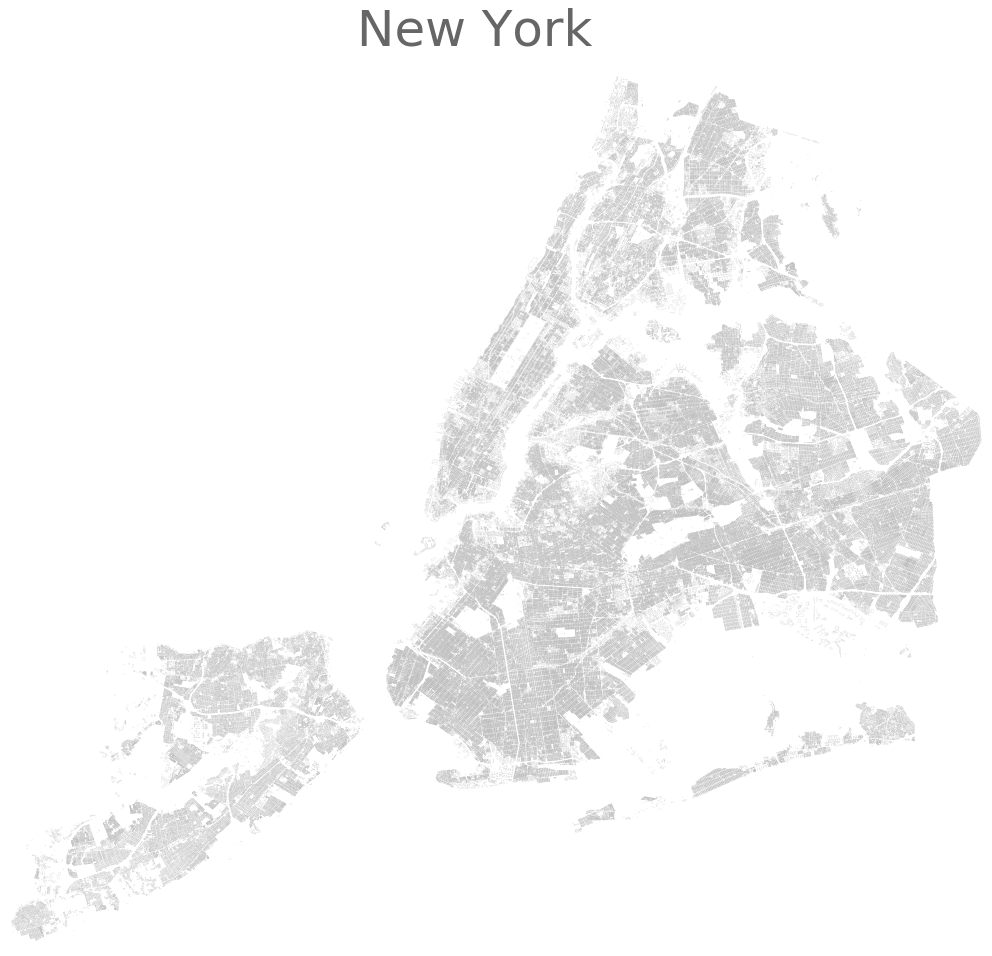

In [17]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle(title, fontsize=50, y=.94, color=fontcolor)

m = Basemap(llcrnrlon=x0, llcrnrlat=y0,
            urcrnrlon=x1, urcrnrlat=y1,
            lat_0=cx, lon_0=cy,
            resolution='c', projection='mill')

# Avoid border around map.
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
m.readshapefile(shpfile, 'city', linewidth=.15, color="0.75")
m.pcolormesh(lon, lat, region_trips_data.reshape(50, 50),
             alpha=0.5, latlon=True, cmap='RdBu_r')

plt.colorbar(label='Trips count');
plt.show()

4\. Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

In [39]:
import folium

m = folium.Map(location=[cy, cx],
               tiles='Stamen Toner',
               min_lat=40.49612, max_lat=40.91553,
               min_lon=-74.25559, max_lon=-73.70001) 

folium.CircleMarker(
    location=[40.689249, -74.044500],
    popup='Statue of Liberty',
    radius=5000,
    color='#3186cc',
    fill_color='#3186cc'
).add_to(m)

m

5\. Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

In [2]:
import geojson
from geojson import MultiPolygon, Point
from geojson import Polygon
from geojson import Feature
from geojson import FeatureCollection, GeometryCollection

In [3]:
def get_geo_data(reg_data):
    geo_collection = []

    for region in reg_data.iterrows():
        polygon = Polygon([[(region[1].west, region[1].south), (region[1].west, region[1].north),
                           (region[1].east, region[1].north), (region[1].east, region[1].south),
                           (region[1].west, region[1].south)]])
        geo_collection.append(Feature(geometry = polygon, cell = region[1].region))

    return FeatureCollection(geo_collection)

In [21]:
geo_data = get_geo_data(regions)

In [24]:
region_trips_mean = data.groupby(["region"]).trips.mean()
trips = pd.DataFrame(region_trips_mean)
trips["region"] = trips.index.get_values()

In [ ]:
m = folium.Map(location=[cy, cx],
               tiles='Stamen Toner',
               min_lat=40.49612, max_lat=40.91553,
               min_lon=-74.25559, max_lon=-73.70001) 

m.choropleth(
    geo_str = geo_data,
    data = trips,
    columns = ["region", 'trips'],
    key_on = 'feature.cell',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Trips count'
)

folium.LayerControl().add_to(m)
m

6\. Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

In [42]:
#filter_trips = trips[trips.trips >= 5]
filter_trips = trips
filter_trips.region = list(map(lambda x: int(x.split("_")[1]), trips.region))
print("Filtered trip data count is " + str(filter_trips.shape[0]))

Filtered trip data count is 102


In [43]:
geo_data = get_geo_data(regions.iloc[filter_trips.region - 1])

In [44]:
m = folium.Map(location=[cy, cx],
               tiles='Stamen Toner',
               min_lat=40.49612, max_lat=40.91553,
               min_lon=-74.25559, max_lon=-73.70001) 

m.choropleth(
    geo_str = geo_data,
    data = filter_trips,
    columns = ["region", 'trips'],
    key_on = 'feature.cell',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Trips count'
)

folium.LayerControl().add_to(m)
m

/Users/Ar4eBaT/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.
  


7\. Сохраните ноутбук в формате html, запакуйте ipynb и html в один архив и загрузите его в форму (html облегчит задачу проверки вашим рецензентам — в ipynb динамические карты часто не сохраняются, а для выполнения кода рецензентам придётся устанавливать все библиотеки).